# 標準偏差

## 偏差と分散と標準偏差

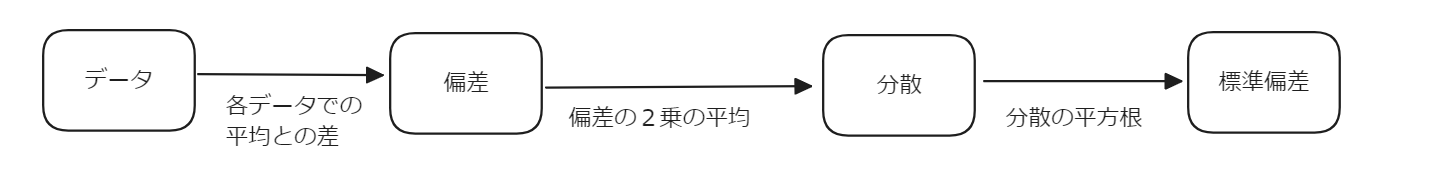


#### 偏差

$x_i - \bar{x}$

- 各データ点から平均値を引いた値
- 各データがどれだけ中心から逸脱しているか
- 平均からどのぐらい偏っているか
- 平均からどのぐらいズレているか
- 正と負の値がある
- 英語で deviation は基準からのズレ


#### 分散

$ \sigma^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2$

- 偏差の２乗の平均
- 全体的なバラつき具合
- ２乗するので偏差が負でも正になる（正負を無視してバラつきを示せる）

#### 標準偏差

$\sigma = \sqrt{\sigma^2}$

- 分散の平方根
- 全体的なバラつき具合を示す
- 元の単位に戻す（分散で二乗されたから）

# 分散の比較

分散はデータのバラつきぐらいを表します。そこで、分散が小さいもの、中くらいのもの、大きいものをイメージにしてみます。

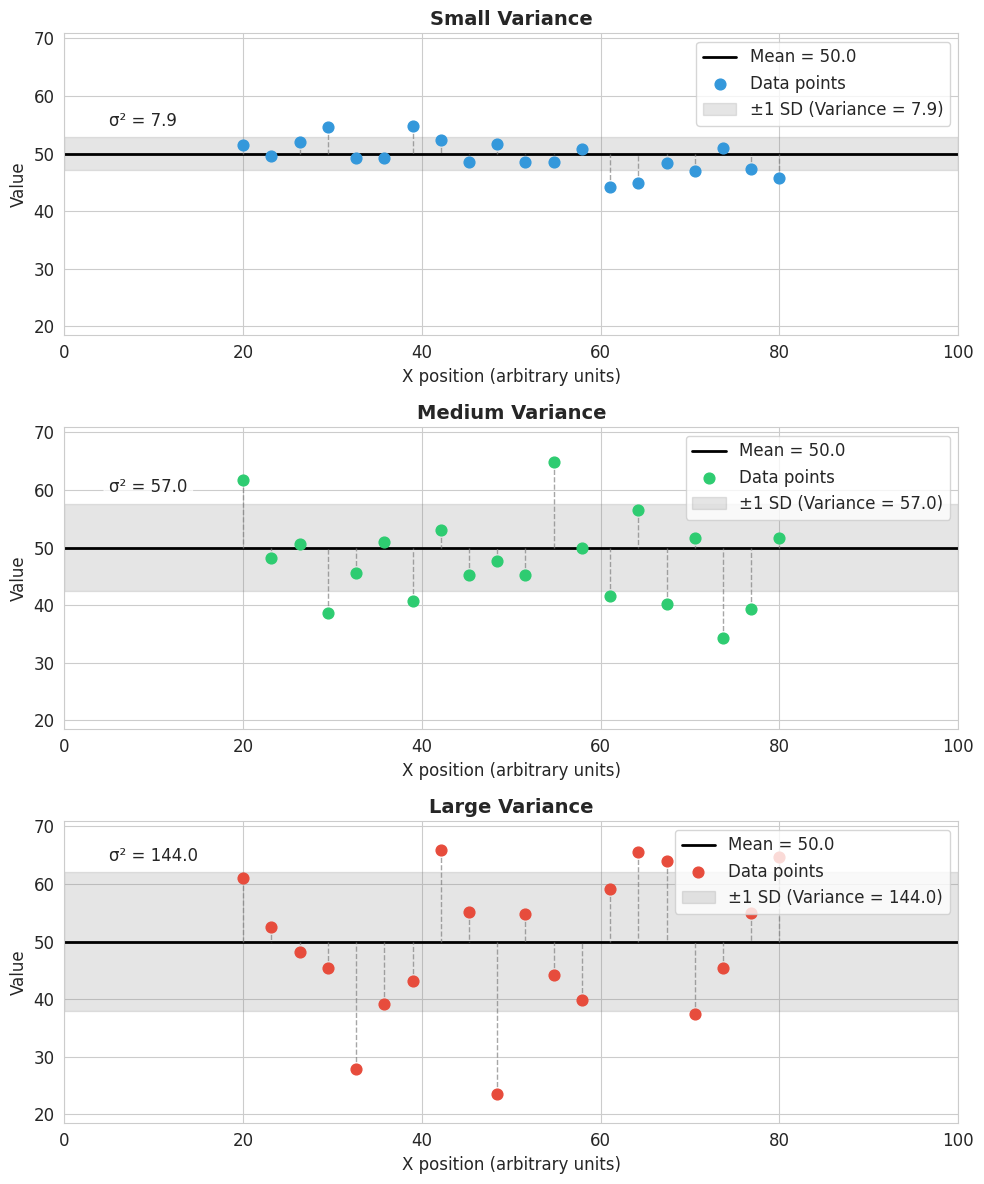

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import LineCollection
import seaborn as sns

# Set the style
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 12})

# Create figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Generate data with different variances but same mean
np.random.seed(42)  # For reproducibility
mean = 50
small_variance_data = np.random.normal(mean, 3, 20)
medium_variance_data = np.random.normal(mean, 8, 20)
large_variance_data = np.random.normal(mean, 15, 20)

# Set the same x-range for all plots
x_min, x_max = 0, 100  # Range for x-axis
data_sets = [small_variance_data, medium_variance_data, large_variance_data]
titles = ["Small Variance", "Medium Variance", "Large Variance"]
colors = ["#3498db", "#2ecc71", "#e74c3c"]

for i, (ax, data, title, color) in enumerate(zip(axes, data_sets, titles, colors)):
    # X positions for data points (evenly spaced)
    x_positions = np.linspace(20, 80, len(data))
    
    # Calculate variance and standard deviation
    variance = np.var(data)
    std_dev = np.std(data)
    
    # Plot setup
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(min(min(data_sets[0]), min(data_sets[1]), min(data_sets[2])) - 5, 
               max(max(data_sets[0]), max(data_sets[1]), max(data_sets[2])) + 5)
    
    # Plot mean line
    ax.axhline(y=mean, color='black', linestyle='-', linewidth=2, label=f'Mean = {mean:.1f}')
    
    # Plot data points
    ax.scatter(x_positions, data, color=color, s=60, zorder=3, label='Data points')
    
    # Plot deviation lines from each point to mean
    for x, y in zip(x_positions, data):
        ax.plot([x, x], [y, mean], color='gray', linestyle='--', alpha=0.7, linewidth=1)
    
    # Shade variance area
    ax.axhspan(mean - std_dev, mean + std_dev, alpha=0.2, color='gray', 
              label=f'±1 SD (Variance = {variance:.1f})')
    
    # Add annotations
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('X position (arbitrary units)', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.legend(loc='upper right')
    
    # Add variance text annotation
    text_x = 5
    ax.text(text_x, mean + std_dev + 2, f"σ² = {variance:.1f}", fontsize=12, 
           bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))

plt.tight_layout()
plt.savefig('variance_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

上の三つのグラフを見比べると、分散（Variance）の大きさの違いを、データポイントの偏差（平均との差）と合わせて理解できます。

分散$\sigma^2$はそれぞれ

- $\sigma^2=7.9$ 
- $\sigma^2=57.0$
- $\sigma^2=144.0$

です。この分散をグラフ中で示すために、分散の平方根、つまり標準偏差を用いて「グレーの領域」として示しています。

# 標準偏差

以下は、データポイントが増えて、バラつきが変化するとともに、標準偏差も変化するようすを示すアニメーションです。青い点がデータポイントを表し、ひとつずつ集計に加えられ、合計で50個に達したら終了します。グレーの領域が標準偏差のエリアです。

<img src="img/standard_deviation2.gif" alt="Description of GIF" style="width:800px;"/>

#### アニメーションのコード

In [6]:
%matplotlib notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set random seed for reproducibility
np.random.seed(0)

# Generate sample data: 50 points with an approximate mean of 50 and standard deviation of 10
n_points = 50
data = np.random.randn(n_points) * 10 + 50

# Prepare the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-1, n_points)
ax.set_ylim(min(data) - 10, max(data) + 10)
ax.set_xlabel('Data Index')
ax.set_ylabel('Value')
ax.set_title('Animation of Sample Standard Deviation Calculation')

def update(frame):
    # Clear the axis for the new frame
    ax.cla()
    
    # Get the current data up to the frame index
    current_data = data[:frame + 1]
    x = np.arange(len(current_data))
    
    # Calculate mean and sample standard deviation (using ddof=1)
    mean_val = np.mean(current_data)
    std_val = np.std(current_data, ddof=1) if len(current_data) > 1 else 0
    
    # Plot the standard deviation region as a gray shaded area
    ax.axhspan(mean_val - std_val, mean_val + std_val, color='gray', alpha=0.3, label='Std. Dev. Region')
    
    # Plot current data points
    ax.scatter(x, current_data, color='blue', label='Data Points')
    
    # Plot the mean as a horizontal dashed line
    ax.hlines(mean_val, -1, n_points, color='red', linestyle='--', label='Mean')
    
    # Draw dashed lines representing the deviation from the mean
    for i, y in enumerate(current_data):
        ax.plot([i, i], [y, mean_val], color='gray', linestyle=':')
    
    # Set axis limits and labels
    ax.set_xlim(-1, n_points)
    ax.set_ylim(min(data) - 10, max(data) + 10)
    ax.set_xlabel('Data Index')
    ax.set_ylabel('Value')
    ax.set_title(f'Animation of Sample Std. Deviation (n = {len(current_data)})')
    ax.legend(loc='upper right')
    
    # Display current mean and standard deviation on the plot
    ax.text(0.05, 0.95, f'Mean: {mean_val:.2f}\nStd. Dev.: {std_val:.2f}', 
            transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Create the animation and assign to a global variable to prevent garbage collection
anim = animation.FuncAnimation(fig, update, frames=n_points, interval=500, repeat=False)

gif_filename = "standard_deviation2.gif"
writer = animation.PillowWriter(fps=1)
anim.save(gif_filename, writer=writer)


さらに、次のアニメーションはデータをヒストグラムの加えていき、それがどのように標準偏差のカーブに近づいていくかを示しています。データポイントが増えるにつれ、平均と標準偏差も変化する様子が分かります。

<img src="img/standard_deviation1.gif" alt="Description of GIF" style="width:800px;"/>

#### アニメーションのコード

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set random seed for reproducibility
np.random.seed(0)

# Generate sample data: 50 points with an approximate mean of 50 and standard deviation of 10
n_points = 50
data = np.random.randn(n_points) * 10 + 50

# Prepare the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.set_title("Histogram and Normal Distribution Overlay")

def update(frame):
    # Clear the axis for each new frame
    ax.cla()
    
    # Select current data up to frame index
    current_data = data[:frame + 1]
    
    # Plot histogram of the current data with density normalization
    counts, bins, patches = ax.hist(current_data, bins=10, density=True, alpha=0.6, color='blue', label='Histogram')
    
    # Calculate sample mean and standard deviation (using ddof=1)
    mean_val = np.mean(current_data)
    std_val = np.std(current_data, ddof=1) if len(current_data) > 1 else 0
    
    # Define x range based on histogram bin range
    x_min = bins[0]
    x_max = bins[-1]
    x = np.linspace(x_min, x_max, 200)
    
    # If there are at least two data points and std is nonzero, overlay the normal distribution PDF
    if len(current_data) > 1 and std_val != 0:
        pdf = (1 / (std_val * np.sqrt(2 * np.pi))) * np.exp(-((x - mean_val) ** 2) / (2 * std_val ** 2))
        ax.plot(x, pdf, 'r--', label='Normal PDF')
    
    # Set axis labels and title for current frame
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.set_title(f"Histogram and Normal Distribution Overlay (n = {len(current_data)})")
    ax.legend(loc="upper right")
    
    # Display current mean and standard deviation as text annotation
    ax.text(0.05, 0.95, f"Mean: {mean_val:.2f}\nStd Dev: {std_val:.2f}",
            transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
    
    # Optionally, maintain consistent x-axis limits
    ax.set_xlim(min(data) - 10, max(data) + 10)

# Create the animation and assign it to a variable to prevent garbage collection
anim = animation.FuncAnimation(fig, update, frames=n_points, interval=500, repeat=False)


gif_filename = "standard_deviation1.gif"
writer = animation.PillowWriter(fps=1)
anim.save(gif_filename, writer=writer)

#from IPython.display import HTML
#HTML(anim.to_jshtml())
